In [1]:
import pandas as pd
import numpy as np
import warnings
import seaborn as sea
import matplotlib.pyplot as plt

warnings.filterwarnings('ignore')

file_path = 'loan.csv'
loan = pd.read_csv(file_path)

In [2]:
loan.head(2)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


# I. Understanding our data.

In [3]:
print("Shape of our dataframe \n(Rows, Columns) : "+str(loan.shape))
print("\nPercentage of null values present in our dataframe: " + str((loan.isnull().sum().sum() / (loan.shape[0]* loan.shape[1]) * 100) . round(3))+str(" %\n"))

Shape of our dataframe 
(Rows, Columns) : (39717, 111)

Percentage of null values present in our dataframe: 51.34 %



In [4]:
loan.dtypes

id                              int64
member_id                       int64
loan_amnt                       int64
funded_amnt                     int64
funded_amnt_inv               float64
                               ...   
tax_liens                     float64
tot_hi_cred_lim               float64
total_bal_ex_mort             float64
total_bc_limit                float64
total_il_high_credit_limit    float64
Length: 111, dtype: object

In [5]:
loan.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
count,3.971700e+04,3.971700e+04,39717.000000,39717.000000,39717.000000,39717.000000,3.971700e+04,39717.000000,39717.000000,39717.000000,...,0.0,0.0,0.0,0.0,39020.000000,39678.0,0.0,0.0,0.0,0.0
mean,6.831319e+05,8.504636e+05,11219.443815,10947.713196,10397.448868,324.561922,6.896893e+04,13.315130,0.146512,0.869200,...,NaN,NaN,NaN,NaN,0.043260,0.0,NaN,NaN,NaN,NaN
std,2.106941e+05,2.656783e+05,7456.670694,7187.238670,7128.450439,208.874874,6.379377e+04,6.678594,0.491812,1.070219,...,NaN,NaN,NaN,NaN,0.204324,0.0,NaN,NaN,NaN,NaN
min,5.473400e+04,7.069900e+04,500.000000,500.000000,0.000000,15.690000,4.000000e+03,0.000000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
25%,5.162210e+05,6.667800e+05,5500.000000,5400.000000,5000.000000,167.020000,4.040400e+04,8.170000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
50%,6.656650e+05,8.508120e+05,10000.000000,9600.000000,8975.000000,280.220000,5.900000e+04,13.400000,0.000000,1.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
75%,8.377550e+05,1.047339e+06,15000.000000,15000.000000,14400.000000,430.780000,8.230000e+04,18.600000,0.000000,1.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
max,1.077501e+06,1.314167e+06,35000.000000,35000.000000,35000.000000,1305.190000,6.000000e+06,29.990000,11.000000,8.000000,...,NaN,NaN,NaN,NaN,2.000000,0.0,NaN,NaN,NaN,NaN


# II. Data Cleaning

###  Removing unwanted columns

####  i. Removing colmns with null values

1. *Columns with fully null values can be removed*
2. *If columns with more than 60% of its values are null then it can also be removed*

In [6]:
loan.dropna( axis = 1 , how  = "all" , inplace = True)
print("The number of columns remaining after removal of null-valued columns: "+str(loan.shape[1]))

The number of columns remaining after removal of null-valued columns: 57


In [7]:
null_df = (loan.isnull().sum() / loan.shape[0] * 100)
major_null_columns = null_df [ null_df > 60 ].index

loan.drop(major_null_columns , axis=1 , inplace =True)

print("The number of columns after removal of major-null columns : "+str(loan.shape[1]))

The number of columns after removal of major-null columns : 54


####  ii. Check for columns with have only unique values  . These can be removed too.

In [8]:
nunique = loan.nunique()
uniqueval_columns = nunique[nunique == 1].index 
loan.drop(uniqueval_columns, axis=1, inplace =True)

print("The number of columns remaining after removal of single-valued columns: "+ str(loan.shape[1]))

The number of columns remaining after removal of single-valued columns: 45


####  iii. Check for columns which has irrelevant data 
The data present in these columns don't help us with loan repayment analysis 

In [9]:
irrelevant_columns = ['member_id', 'funded_amnt_inv','url', 'desc', 'title','zip_code',
                      'emp_title','revol_bal',"earliest_cr_line","total_pymnt_inv",
                     "funded_amnt","inq_last_6mths","out_prncp","out_prncp_inv","total_rec_prncp",
                    "total_rec_int","total_rec_late_fee","collection_recovery_fee","last_credit_pull_d","recoveries"]

loan.drop(irrelevant_columns, axis=1, inplace = True)

####  iv. Check for duplicate rows in dataframe

In [10]:
loan[loan.duplicated()]

,id,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,...,dti,delinq_2yrs,open_acc,pub_rec,revol_util,total_acc,total_pymnt,last_pymnt_d,last_pymnt_amnt,pub_rec_bankruptcies


Luckily we don't have any duplicate rows in our data frame

In [11]:
loan.isnull().sum()

id                         0
loan_amnt                  0
term                       0
int_rate                   0
installment                0
grade                      0
sub_grade                  0
emp_length              1075
home_ownership             0
annual_inc                 0
verification_status        0
issue_d                    0
loan_status                0
purpose                    0
addr_state                 0
dti                        0
delinq_2yrs                0
open_acc                   0
pub_rec                    0
revol_util                50
total_acc                  0
total_pymnt                0
last_pymnt_d              71
last_pymnt_amnt            0
pub_rec_bankruptcies     697
dtype: int64

In [12]:
null_valued_columns = loan.isnull().sum()
print("The columns which needs null-value treatment:\n")
print(null_valued_columns[ null_valued_columns > 0 ])

The columns which needs null-value treatment:

emp_length              1075
revol_util                50
last_pymnt_d              71
pub_rec_bankruptcies     697
dtype: int64


In [13]:
loan["emp_length"].fillna( loan["emp_length"].mode()[0] , inplace = True )

In [14]:
print("Most repeating value in 'revol_util' column is : "+str(loan["revol_util"].mode()[0]))

# We can replace the 50 null values with 0.0

loan["revol_util"].fillna( loan["revol_util"].mode()[0] , inplace = True )

Most repeating value in 'revol_util' column is : 0%


In [15]:
# #last_pymnt_d is the date of which the customer paid amount ,Blank value cells are dropped 

loan = loan[  loan["last_pymnt_d"].isnull() == False ]


In [16]:
loan["pub_rec_bankruptcies"].fillna( 0.00 , inplace=True )

#  III. Data Manipulation

We need to standardise the data into our desired format (standard accessible format)

In [17]:
#Totally we have 38 collumns in our dataframe now 

# " 'months' needs to removed from the Term column. Months should be in int format"
loan["term"] = loan["term"].apply(lambda x : str(x).replace("months",""))
loan["term"] = loan["term"].astype(int)

# # '%' character to be removed from int_rate and revol_util
loan["int_rate"] = loan["int_rate"].apply(lambda x : str(x).replace("%",""))
loan["int_rate"] = loan["int_rate"].astype(float)

loan["revol_util"] = loan["revol_util"].apply(lambda x : str(x).replace("%",""))
loan["revol_util"] = loan["revol_util"].astype(float)

# Our interest is to have only the number of years in emp_length
# -> 'years','year','+' can be replaced with '' empty characacter
# -> '<1 year' can be assumed as 0.5 years (We would have assumed this to be 1 but there more than 3,000 records in this category
loan['emp_length'] = loan['emp_length'].apply( lambda x : str(x).replace("years","").replace("year","")) 
loan['emp_length'] = loan['emp_length'].apply( lambda x : str(x).replace("< 1","0.5").replace("+","")) 
loan['emp_length'] = loan['emp_length'].astype(float)

#Standardising the datetime values
loan["issue_d"] = pd.to_datetime(loan["issue_d"], format='%b-%y')
loan["last_pymnt_d"] = pd.to_datetime(loan["last_pymnt_d"], format='%b-%y')
# loan["last_credit_pull_d"] = pd.to_datetime(loan["last_credit_pull_d"], format='%b-%y')

# IV.  Check for Outliers in data

In [18]:
loan.shape

(39646, 25)

Outliers can afftect our overall analysis. It's important to check our data columns for outliers.

These three column can affect the other three column, so we go with these three.

1. loan_amnt
2. annual_inc
3. dti

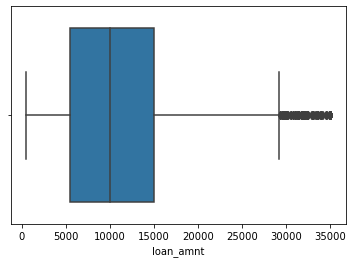

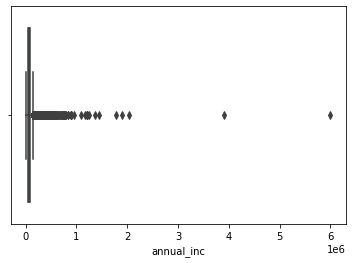

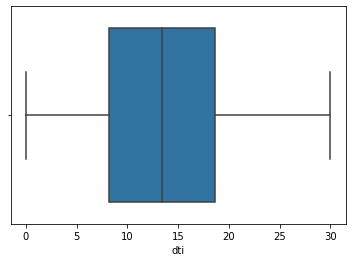

In [19]:
sea.boxplot(loan["loan_amnt"])
plt.show()
sea.boxplot(loan["annual_inc"])
plt.show()
sea.boxplot(loan["dti"])
plt.show()


# sea.boxplot( data = loan[["loan_amnt","annual_inc","dti"]])

Its clear that the 'annual_inc' has outliers

<AxesSubplot:xlabel='annual_inc'>

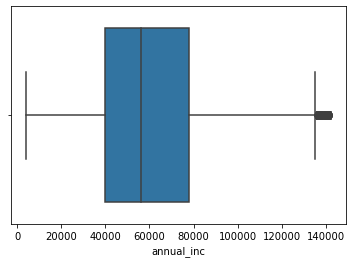

In [20]:
# Removing outliers from annual_inc

# considering data till 95th percentile.

loan["annual_inc"].mean()

upper = loan["annual_inc"].quantile(0.95)

loan = loan[ loan["annual_inc"] <= upper]

sea.boxplot(loan["annual_inc"])



#  V. Check for derived Values

In [21]:
loan["total_expected_repayment"] = (loan["term"]*((loan["loan_amnt"] * (loan["int_rate"] / 1200 ) ) * (((1 + (loan["int_rate"]/1200))**(loan["term"])) / (((1 + (loan["int_rate"]/1200))**(loan["term"])) - 1)))).round(2)

loan["total_repaid_percentage"] =  ((loan["total_pymnt"]/loan["total_expected_repayment"])*100).round(0)

In [22]:
loan["total_repaid_percentage"].max()

125.0

In [23]:
loan.columns


loan["Installments_Paid"] =  loan["last_pymnt_d"] - loan["issue_d"]

loan["Installments_Paid"] = (loan["Installments_Paid"].dt.days // 30 )

In [24]:
loan[ (loan["total_repaid_percentage"] > 100) & ( loan["loan_status"] == "Current")] 

,id,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,...,pub_rec,revol_util,total_acc,total_pymnt,last_pymnt_d,last_pymnt_amnt,pub_rec_bankruptcies,total_expected_repayment,total_repaid_percentage,Installments_Paid
15618,745718,6400,60,6.0,132.64,E,E3,2.0,RENT,75000.0,...,0,62.5,25,8613.81,2016-05-01,132.64,0.0,7423.80,116.0,60
15972,725556,10400,60,6.0,218.99,E,E3,5.0,MORTGAGE,29000.0,...,0,95.6,15,13886.92,2016-05-01,218.99,0.0,12063.67,115.0,60


In [25]:
loan["issue_year"] = loan["issue_d"].dt.year
loan["last_pymnt_year"] = loan["last_pymnt_d"].dt.year
loan["year_gap"] = loan["last_pymnt_year"][loan["loan_status"]=="Charged Off"] - loan["issue_year"] 

In [26]:
# sea.clustermap(loan.corr() , annot = True , figsize = ( 15,15 ) , cmap= 'mako')

#  VI. Univariate Analysis

We'll concentrate on the behaviour of these below data fields. Univariate analysis helps us to draw insights from these

1. Home ownership
2. Employee Annual income
3. State
4. Loan status
5. total_repaid_percentage
6. term
7. purpose

In [27]:
#there are only three values under none , so assigned those 3 under "other" category.  
loan["home_ownership"][loan["home_ownership"] == "NONE"] = "OTHER" 

Borrowers who own houses cover 7.78 % of our data


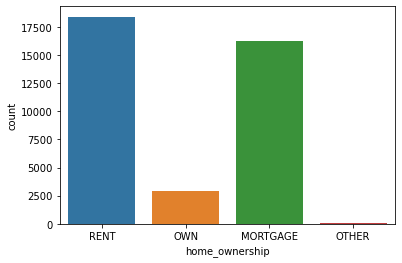

In [28]:
sea.countplot(loan["home_ownership"])
print("Borrowers who own houses cover "+str(round((loan[loan["home_ownership"]=="OWN"].shape[0]/loan.shape[0])*100,2))+" % of our data")
# print(round((loan[loan["home_ownership"]=="OWN"].shape[0]/loan.shape[0])*100,2))

Percentage of not-verified loans :43.73 %


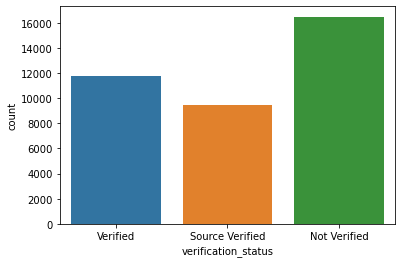

In [29]:
sea.countplot(loan["verification_status"])

print("Percentage of not-verified loans :"+str(round((loan[loan["verification_status"]=="Not Verified"].shape[0]/loan.shape[0])*100,2))+str(" %"))

Percentage of Charged Off borrowers : 14.2 %


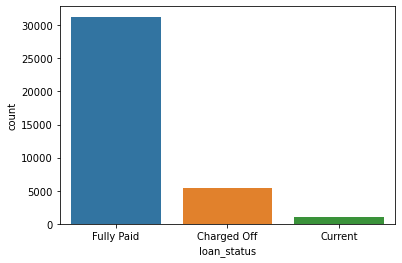

In [30]:
sea.countplot(loan["loan_status"])

print("Percentage of Charged Off borrowers : "+str(round((loan[loan["loan_status"]=="Charged Off"].shape[0]/loan.shape[0])*100,2))+str(" %"))

Most of the loan borrowers hold 'B' as the grade


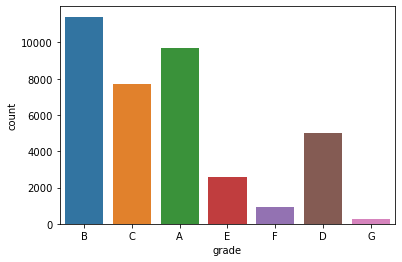

In [31]:
sea.countplot(loan["grade"])
print("Most of the loan borrowers hold 'B' as the grade")

Percentage of employees who has 10 years of work experience: 24.65 %


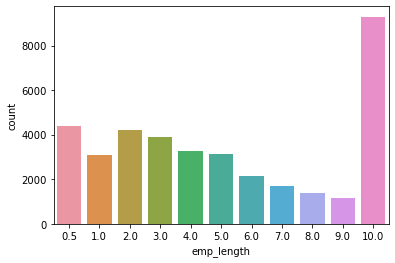

In [32]:
sea.countplot(loan["emp_length"])

print("Percentage of employees who has 10 years of work experience: "+str(round((loan[loan["emp_length"]==10].shape[0] / loan.shape[0])*100,2))+str(" %"))

Totally 54.36 % of loan issued in the year 2011


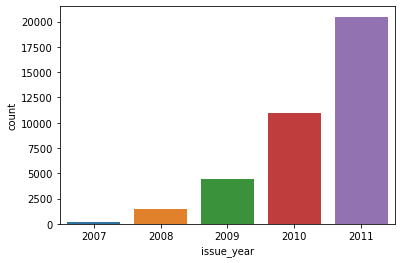

In [33]:
sea.countplot(loan["issue_year"])

print("Totally "+str(round((loan[loan["issue_year"]==2011].shape[0] / loan.shape[0])*100,2))+" % of loan issued in the year 2011")

Debt Consolidation was the purpose of availing loan for 47.34 % of the borrowers


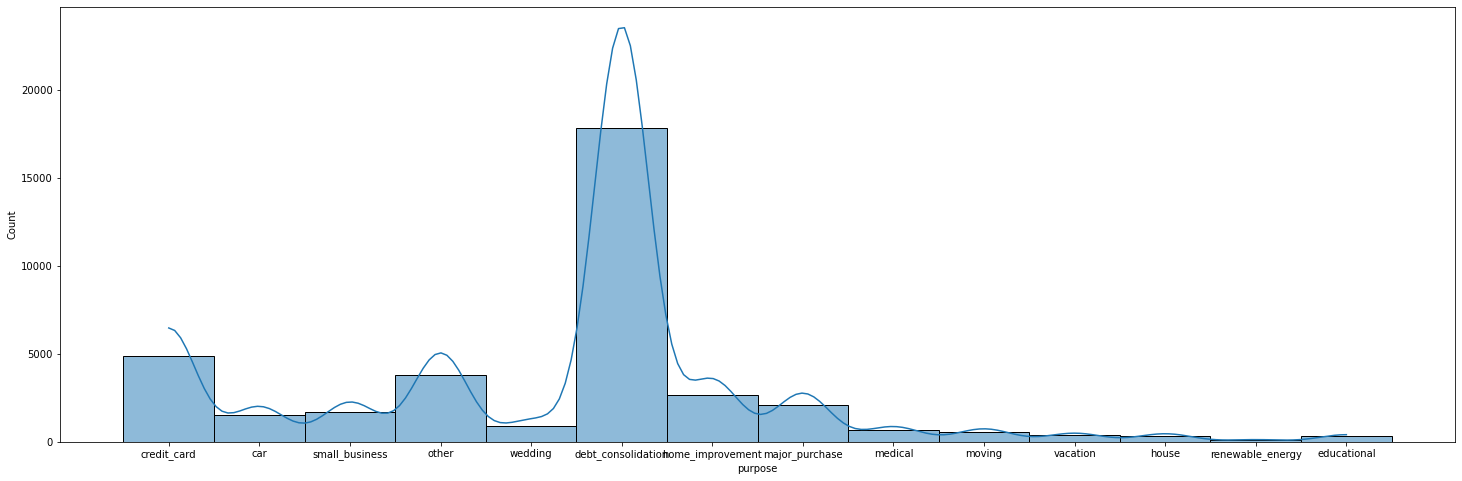

In [34]:
plt.figure( figsize = (25,8) )
sea.histplot(loan["purpose"],kde=True,)

print("Debt Consolidation was the purpose of availing loan for "+str(round((loan[(loan["purpose"] == "debt_consolidation")].shape[0] / loan.shape[0])*100,2))+" % of the borrowers")

Californian borrowers make up 18.0 % of our data


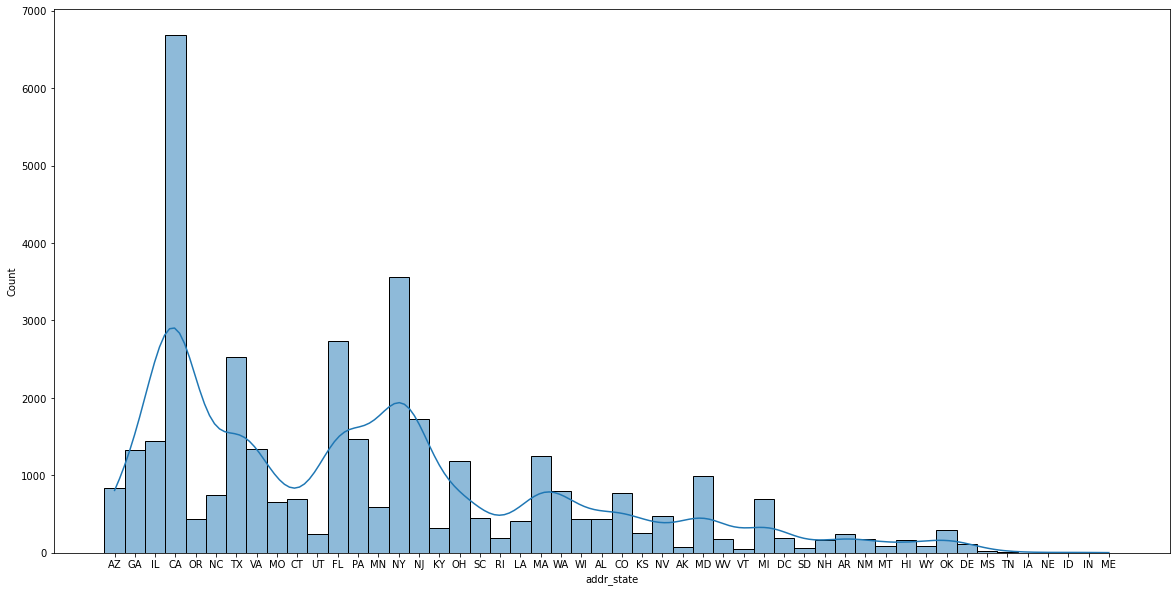

In [35]:
plt.figure( figsize = (20,10))
sea.histplot(loan["addr_state"],kde=True,bins=5)

print("Californian borrowers make up "+str(round(loan[(loan["addr_state"]=="CA")].shape[0] /loan.shape[0],2)*100)+" % of our data")

<AxesSubplot:xlabel='total_repaid_percentage', ylabel='Count'>

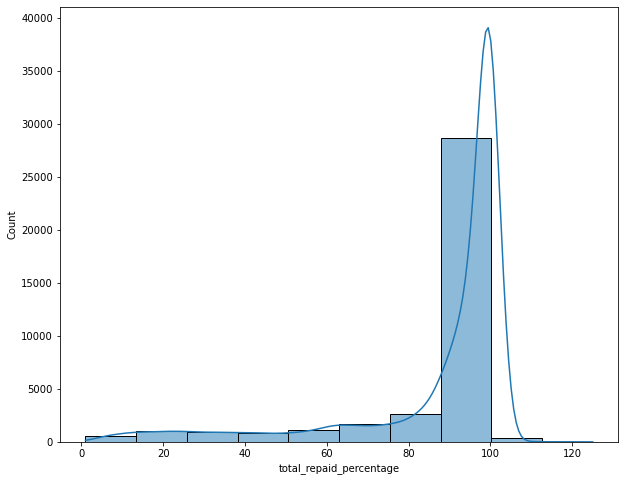

In [36]:
plt.figure( figsize = (10,8))
sea.histplot(loan["total_repaid_percentage"] , bins=10 , kde = True)

### Facts obtained from univariate analysis : 

1. Majority of the loan borrowers either rent the house or mortgage it. Own house loan borrowers are very few
2. 44% of the borrowers income source is not verified
3. Debt consolidation is the major purpose for availing loans . 47.34% of borrowers loans for this specific reason
4. California shows the highest record of loan borrowers. Around 17.74% of total borrowers are from California. Which in      turn gives us 3% of total charged off borrowers from this very same state

5. Charged Off borrower's make up 14% of our data.
6. 24.65% of the borrowers have 10 years of work experience.
7. 54.36% of loan issual happened in the year of 2011

# VII. Segmented Univariate Analysis

<AxesSubplot:xlabel='issue_year', ylabel='count'>

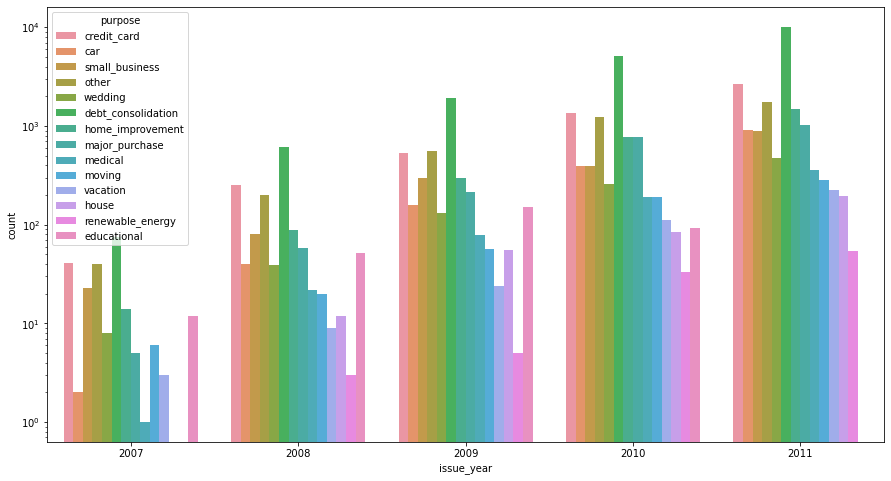

In [37]:
plt.figure( figsize = (15,8))
sea.countplot(data=loan ,x = "issue_year", hue="purpose",log=True)


<AxesSubplot:xlabel='issue_year', ylabel='count'>

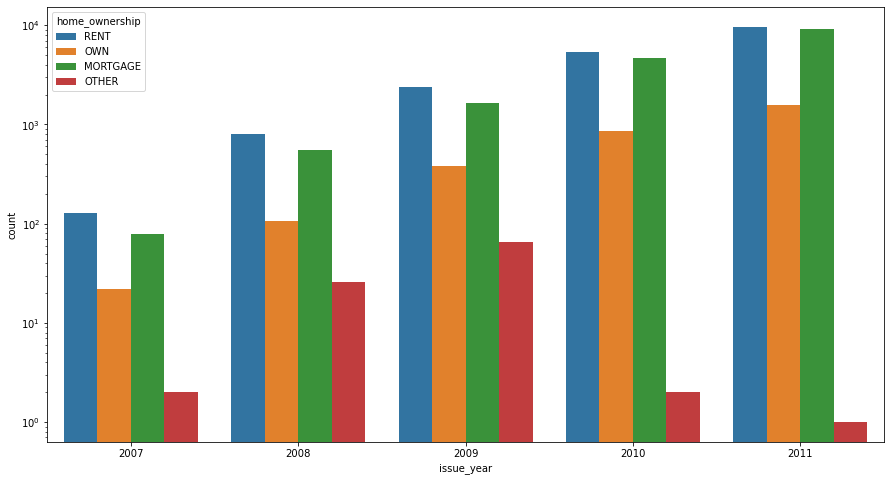

In [38]:
plt.figure( figsize = (15,8))
sea.countplot(data=loan ,x = "issue_year", hue="home_ownership",log=True)

<AxesSubplot:xlabel='emp_length', ylabel='count'>

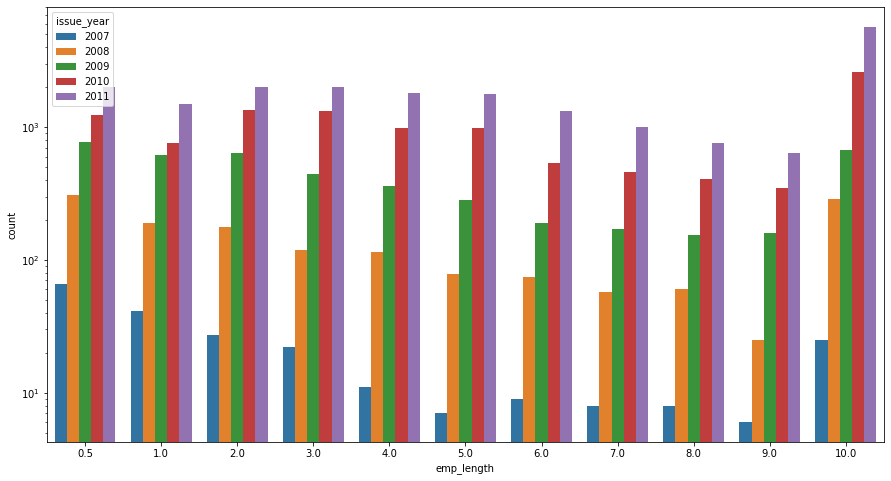

In [39]:
plt.figure( figsize = (15,8))
sea.countplot(data=loan , hue = "issue_year", x ="emp_length",log=True)

### Facts from Segmented univariate analysis

1. Relative differnence between the loan purposes remains the same all time
2. Mortage tenants quantity grew up equal to rental tenants in 2011
3. 2011 shows high records for employees

#  VIII. Bivariate Analysis 

Grades with B3, B4, B5 C1, C2 shows high records for charged Off loans
They make up 30.28 % of the total charged off data


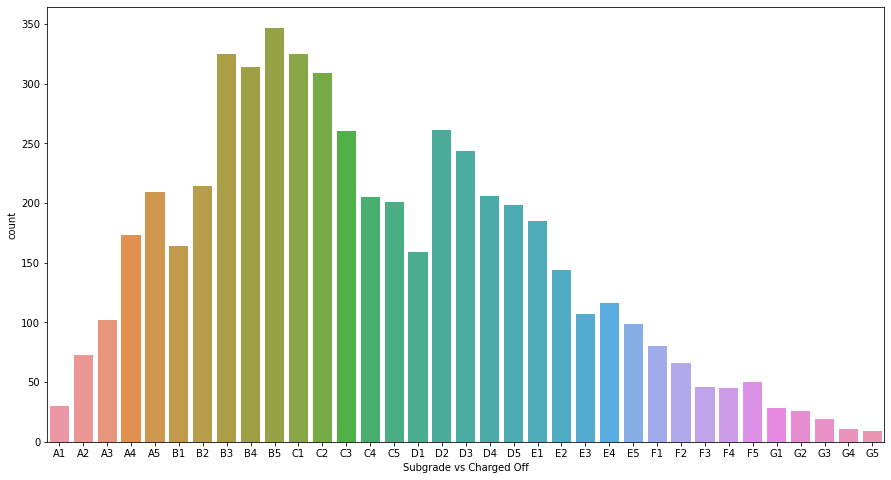

In [40]:
plt.figure( figsize = (15,8))
sea.countplot(loan["sub_grade"][loan["loan_status"] == "Charged Off"].sort_values(ascending=True))
plt.xlabel("Subgrade vs Charged Off")

print("Grades with B3, B4, B5 C1, C2 shows high records for charged Off loans")
print("They make up "+str(round(((loan[loan["loan_status"]=="Charged Off"].groupby(["sub_grade"]).count().sort_values(by='id',ascending=False).head(5).sum()[0])/(loan[loan["loan_status"]=="Charged Off"]).shape[0])*100,2))+" % of the total charged off data")

Safe debt to income ratio is desired to be less than 12%
Borrowers who got charged off with DTI ratio more than 12% is , 62.85981308411215%


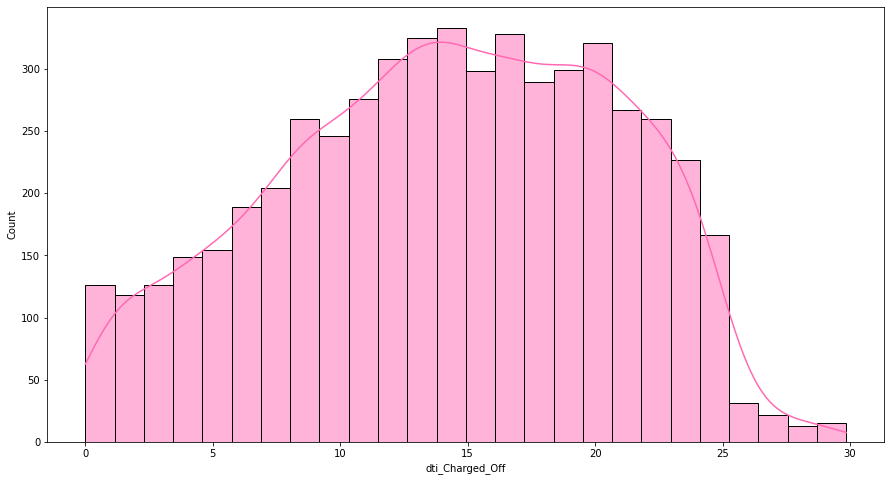

In [41]:
plt.figure( figsize = (15,8))
sea.histplot(loan["dti"][loan["loan_status"] == "Charged Off"],kde=True,color='hotpink')
plt.xlabel("dti_Charged_Off")

print("Safe debt to income ratio is desired to be less than 12%")
print("Borrowers who got charged off with DTI ratio more than 12% is , "+str(((loan[(loan["loan_status"]=="Charged Off") & ((loan["dti"])  > 12)].groupby(["dti"]).count().sort_values(by='dti',ascending=True).sum()[0])/(loan[loan["loan_status"]=="Charged Off"]).shape[0])*100)+"%")

Average loan amount percentage repaid by the borrowers : 44.33 %


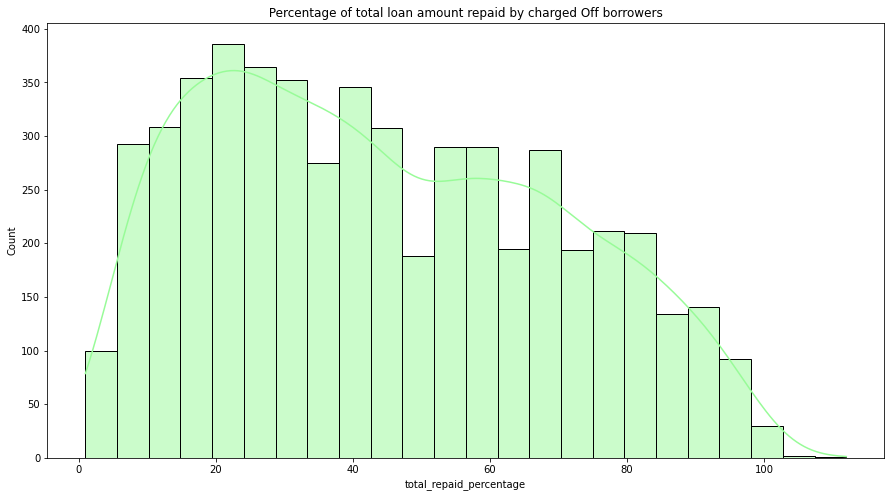

In [42]:
plt.figure( figsize = (15,8))
sea.histplot(loan["total_repaid_percentage"][loan["loan_status"] == "Charged Off"],kde=True,color = 'palegreen')
plt.title(" Percentage of total loan amount repaid by charged Off borrowers ")
print("Average loan amount percentage repaid by the borrowers : "+str(round(loan["total_repaid_percentage"][loan["loan_status"]=="Charged Off"].mean(),2))+" %")

Loan amounts of range 5000$ to 15000$ shows more charged Off records
About 67.5 % of borrowers are charged off for this loan range


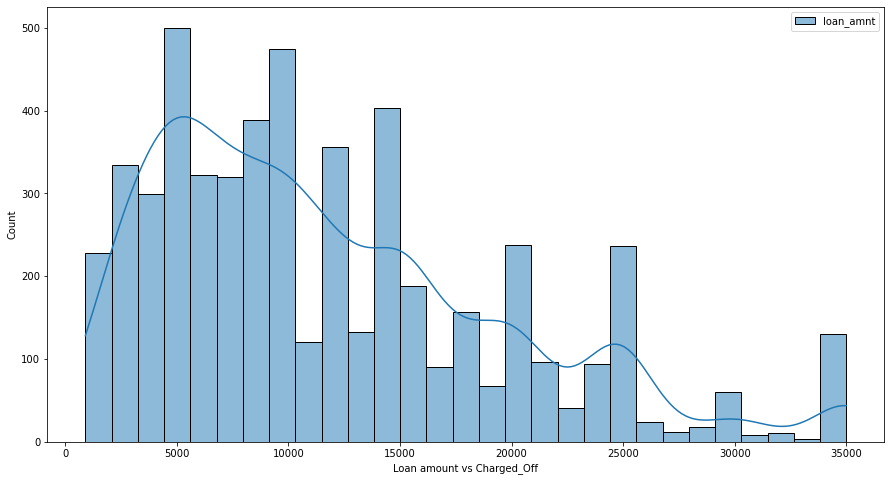

In [43]:
plt.figure( figsize = (15,8))
sea.histplot(loan[["loan_amnt"]][loan["loan_status"] == "Charged Off"].sort_values('loan_amnt'),kde=True)
plt.xlabel("Loan amount vs Charged_Off")

print("Loan amounts of range 5000$ to 15000$ shows more charged Off records")
print("About "+str(round((loan[(loan["loan_status"]=="Charged Off") & (loan["loan_amnt"] >= 5000) & (loan["loan_amnt"] <= 20000)].shape[0] / loan[loan["loan_status"]=="Charged Off"].shape[0])*100,2))+" % of borrowers are charged off for this loan range")

Percentage of Charged Off house owners : 8.02 %


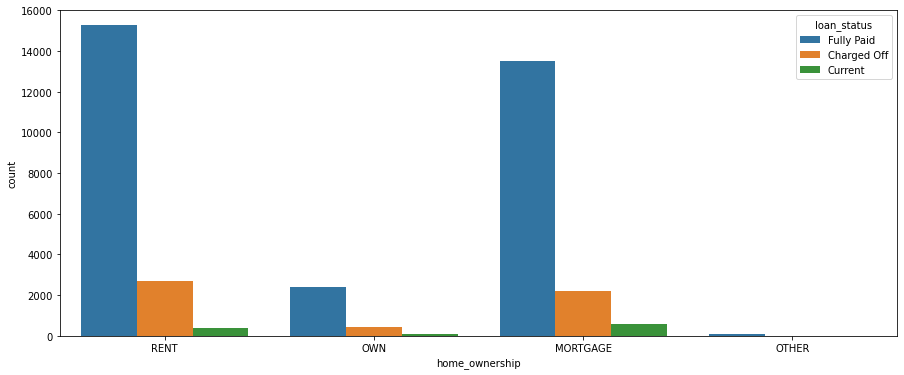

In [44]:
# sea.barplot( data = loan[loan["loan_status"]=="Charged Off"] , x = "loan_status" , y="loan_amnt" , hue="home_ownership" )
plt.figure( figsize= ( 15,6))
sea.countplot(data=loan , x = "home_ownership" , hue='loan_status')

print("Percentage of Charged Off house owners : "+str(round(((loan[(loan["loan_status"]=="Charged Off") & (loan["home_ownership"]=="OWN")].shape[0] / loan[(loan["loan_status"]=="Charged Off")].shape[0])*100),2))+str(" %"))

The years 2011,2012,2013 has more charged Off records
Over 71.21 % of loan payment suspended on these years


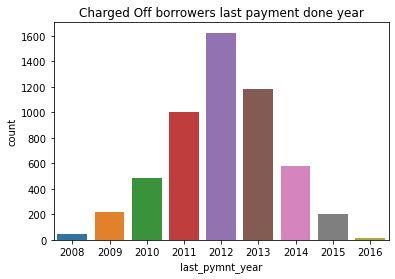

In [45]:
sea.countplot(loan["last_pymnt_year"][loan["loan_status"]=="Charged Off"] ) 
plt.title("Charged Off borrowers last payment done year")

print("The years 2011,2012,2013 has more charged Off records")
print("Over "+str(round((loan[loan["loan_status"]=="Charged Off"].groupby(["last_pymnt_year"]).count().sort_values(ascending=False,by='id').head(3).sum()[0])/(loan[loan["loan_status"]=="Charged Off"].shape[0])*100,2))+" % of loan payment suspended on these years")

Consistent loan payment is found even for the charged Off borrowers.
Over 67.64 % of the borrowers paid installment maximum 2 years 


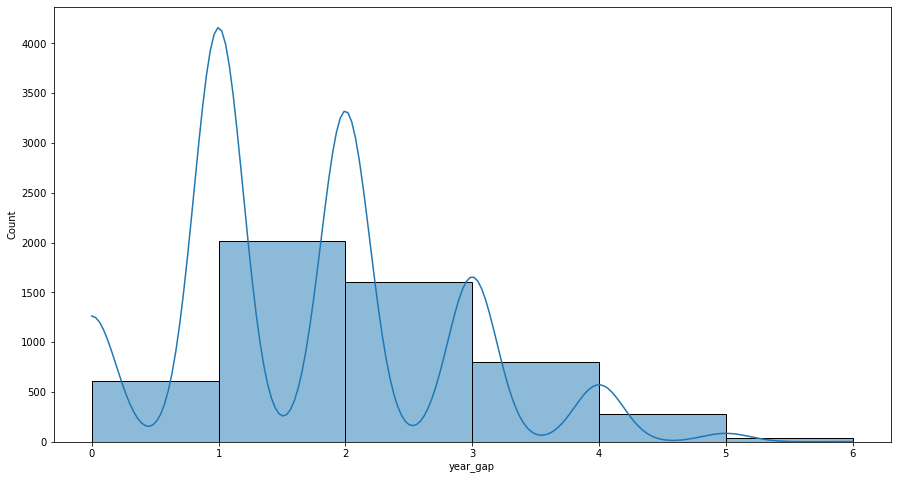

In [46]:
plt.figure( figsize= ( 15,8))
sea.histplot(loan["year_gap"],bins=6 , kde= True) 

print("Consistent loan payment is found even for the charged Off borrowers.")
print("Over "+str(round((loan[loan["loan_status"]=="Charged Off"].groupby(["year_gap"]).count().sort_values(ascending=False , by='id').head(2).sum()[0] / loan[loan["loan_status"]=="Charged Off"].shape[0])*100,2))+" % of the borrowers paid installment maximum 2 years ")

Text(0.5, 0, 'Revolving line utilization rate')

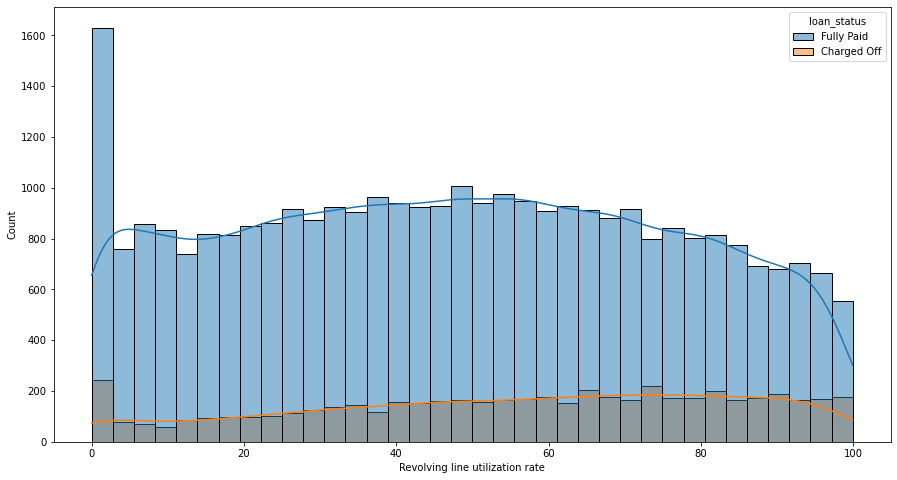

In [47]:
plt.figure( figsize= ( 15,8))
sea.histplot(data=loan[loan["loan_status"]!="Current"] , hue="loan_status" , x="revol_util",kde=True)
plt.xlabel("Revolving line utilization rate")

<AxesSubplot:xlabel='addr_state', ylabel='count'>

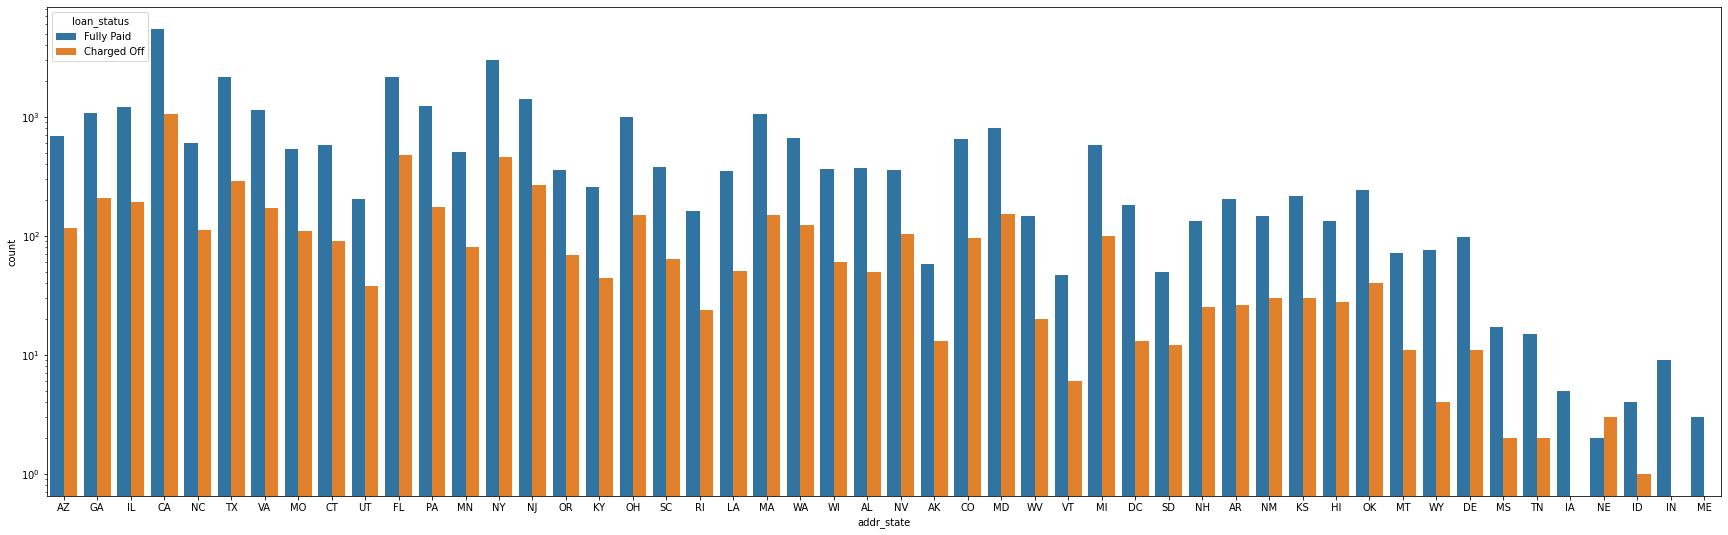

In [48]:
plt.figure( figsize= ( 30,9))
sea.countplot(data=loan[loan["loan_status"] != "Current"] , x = "addr_state" , hue = "loan_status",log=True)

<AxesSubplot:xlabel='open_acc', ylabel='count'>

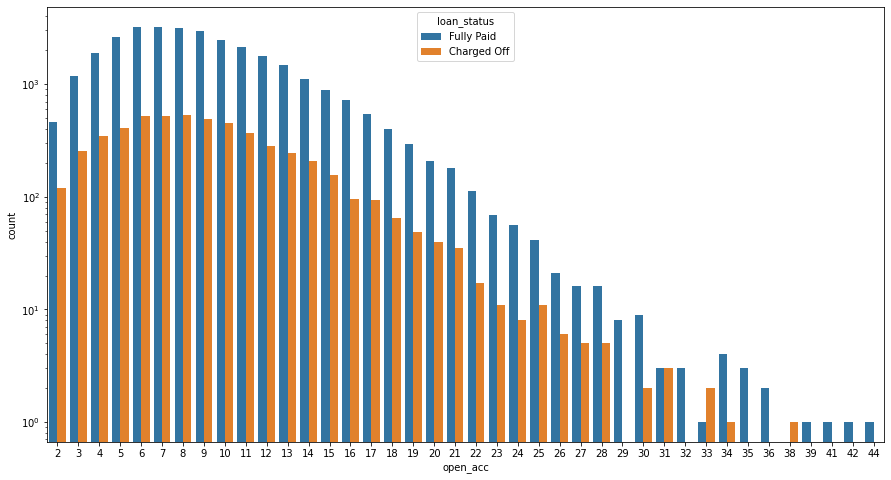

In [49]:
plt.figure( figsize= ( 15,8))
sea.countplot(data=loan[loan["loan_status"] != "Current"] , x = "open_acc" , hue = "loan_status",log=True)

Most of the charged of borrowers have records for delinquency


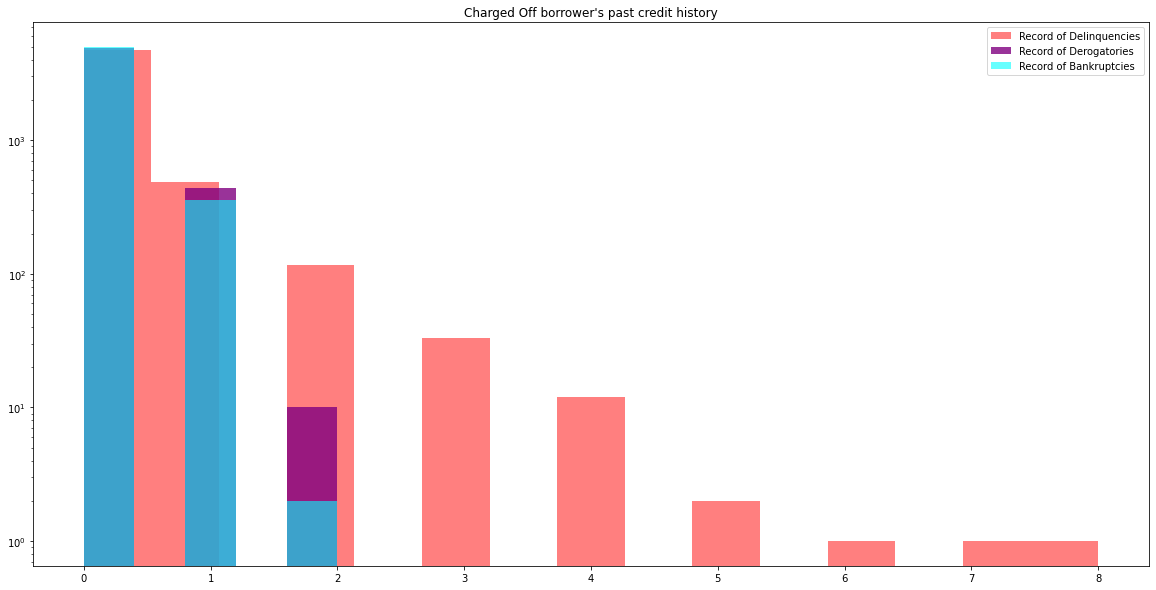

In [50]:
print("Most of the charged of borrowers have records for delinquency")
plt.figure( figsize= ( 20,10))
plt.hist( loan["delinq_2yrs"][loan["loan_status"]=="Charged Off"],bins=15,color="red",alpha=0.5,histtype = 'bar' ,log=True)
plt.hist( loan["pub_rec"][loan["loan_status"]=="Charged Off"],bins=5,color="purple",alpha=0.8 ,histtype = 'bar',log=True)
plt.hist( loan["pub_rec_bankruptcies"][loan["loan_status"]=="Charged Off"],bins=5,color="aqua",alpha=0.6,histtype = 'bar',log=True )
plt.title("Charged Off borrower's past credit history")
plt.legend(['Record of Delinquencies','Record of Derogatories',"Record of Bankruptcies"])
plt.show()

### Facts from Bivariate Inferences:

1. 30.28% of the charged off borrowers belong to these grades : B3,B4,B5,C1,C2
2. 62.86% of the charged off borrowers has dti more than 12
3. On average, Charged Off borrowers repay 44.32% of the total amount
4. Percentage of house owners charged Off = 8.01%
5. Percentage of Charged Off borrowers with Not verified income sources = 38.50%
6. Average loan amount lent for charged off borrowers is 11,800 . About 67% of charge Off happened for the loan amount in the range of 5000 to 15000
7. The years 2011 to 2013 has the most number of charged off records . About 71.2% of charge offs happened in these years
8. If we analyse the loan commitment duration, the data shows that 67.64% of borrowers are charged off less first 2 years of tenure
9. It's hard to predit the loan defaulter using these parameters , "open_acc" , "revol_util" , "addr_state" . Their dustribuion varies uniformly throughout the data
10. Most of the charged Off borrowers have records for delinquency

# IX. Development and analysis of prediction constraints :

Analysing from the facts we obtained from Univariate & Bivariate analysis . We can find high influencing variables , in other words the variables whcih are closely associated with Charged Off borrowers.

### i. List of Driver variables:
1. dti
2. sub_grade
3. total_repaid_percentage
4. home_ownership
5. Verification_status
6. loan_amnt
7. year_gap

### ii. Prediction Methods:

1. House owners are the safest borrowers. Lenders can be confident on them.
2. dti ratio should be less than 12
3. Bankers should critically monitor all borrowers once they paid 40% of total payment . Chances of defaulters are more after the paid this ratio of amount
4. B3, B4, B5, C1, C2 grade borrowers are more likely to default.
5. It's not a good idea to lend money without verifying borrower's income source. So bankers need to eliminate this activity completely
6. The high risky loan amounts which are more likely to default is mostly in the range of 5000 USD to 15000 USD
7. Lenders cannot predict the defaulter within the first year. So it's always good to monitor due date and payment consistency after a year of loan issual

### iii. Constraints using our driver variables:

1. loan[loan["dti"]<=12]]
2. loan[loan["total_repaid_percentage"]>40]
3. loan[loan["home_ownership"] == "OWN"] : This constraint is not valid for all borrowers 
4. loan[loan["verification_status"]=="Source Verified"]
5. loan[loan["last_pymnt_year"] > 1]

###  iv. Testing our constraints with past charged Off borrowers

In [72]:
# Using our constraints we can compare how much data can be identified as charged off

print("Total number of charged off Borrowers in our data : "+str(loan[loan["loan_status"]=="Charged Off"].shape[0]))

print("We have predicted "+str((loan[loan["loan_status"]=="Charged Off"].shape[0])-
                               (loan[ (loan["dti"]<=12) & (loan["total_repaid_percentage"]>40) & 
                                     (loan["verification_status"]=="Source Verified") & 
                                     (loan["loan_status"]=="Charged Off") & (loan["year_gap"]>1) & 
                                     (loan["delinq_2yrs"]==0)].shape[0]))+" charged off borrowers using our constraint")

prediction_perentage = round(((loan[loan["loan_status"]=="Charged Off"].shape[0])-
                              (loan[ (loan["dti"]<=12) & (loan["total_repaid_percentage"]>40) & 
                                    (loan["verification_status"]=="Source Verified") & 
                                    (loan["loan_status"]=="Charged Off")& (loan["year_gap"]>1) & 
                                    (loan["delinq_2yrs"]==0)].shape[0]))/(loan[loan["loan_status"]=="Charged Off"].shape[0]),2)*100

print("\nPrediction accuracy :"+str(prediction_perentage)+" %")

Total number of charged off Borrowers in our data : 5350
We have predicted 5124 charged off borrowers using our constraint

Prediction accuracy :96.0 %


#### INFERENCE :  As we have seen in the final analysis, 96% of the charged Off data lies within our constraint

We can have this 96% as our prediction accuracy

# X. Conclusion : 

The variables dti, total_repaid_percentage , verification_status , home_ownership , last_pymnt_year are three major parameters that can be used to predict the loan defaulter at the maximum of 96% accuracy.

Of course only these variables can't be the major parameter of loan defaulter's everytime . As we see our data, the loan issue rate went peak in 2011, the reason for this is " 2011 US Debt Ceiling Crisis " . It affected many of the people's financial status which lead them to borrow. 

The major influencer variable might be a different one other year, but these five driver variables which we have selected is going to be there all time. Thus we conclude that, our data-driven analysis will definitely help to spot the loan-defaulters.